In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import statistics as st
import math 

In [ ]:
df = pd.read_excel('https://github.com/datagy/Intro-to-Python/raw/master/sportsdata.xls', usecols=['Age'])
print(df.describe())

               Age
count  5000.000000
mean     25.012200
std       5.013849
min       4.000000
25%      22.000000
50%      25.000000
75%      28.000000
max      43.000000


(array([1.000e+00, 1.900e+01, 1.160e+02, 5.340e+02, 1.234e+03, 1.578e+03,
        1.027e+03, 3.880e+02, 9.100e+01, 1.200e+01]),
 array([ 4. ,  7.9, 11.8, 15.7, 19.6, 23.5, 27.4, 31.3, 35.2, 39.1, 43. ]),
 <BarContainer object of 10 artists>)

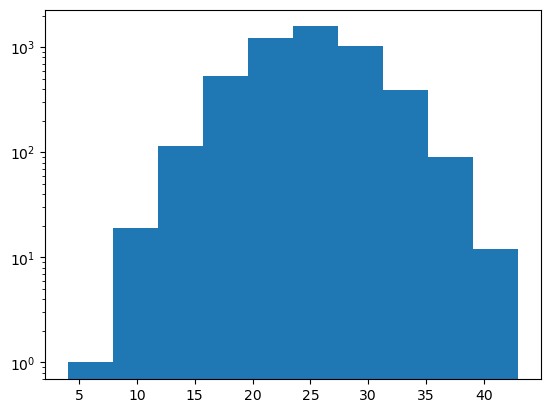

In [ ]:
plt.hist(df['Age'], log=True)

(array([1.000e+00, 5.000e+00, 1.400e+01, 7.600e+01, 1.100e+02, 4.640e+02,
        8.540e+02, 7.990e+02, 1.159e+03, 5.780e+02, 6.020e+02, 2.350e+02,
        8.000e+01, 1.700e+01, 6.000e+00]),
 array([ 4. ,  6.6,  9.2, 11.8, 14.4, 17. , 19.6, 22.2, 24.8, 27.4, 30. ,
        32.6, 35.2, 37.8, 40.4, 43. ]),
 <BarContainer object of 15 artists>)

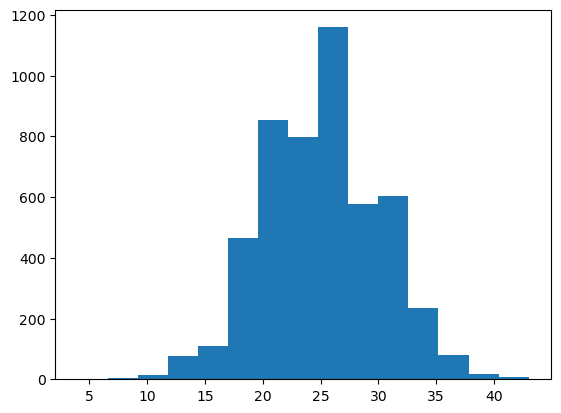

In [ ]:
plt.hist(df['Age'],bins=15, log=False)
#to check more about histograms, please check here https://datagy.io/histogram-python/
#the standart deviation represent how the data is spread over the mean

[-2.66003362 -2.4661756  -2.27231759 -2.07845957 -1.88460156 -1.69074354
 -1.49688552 -1.30302751 -1.10916949 -0.91531148 -0.72145346 -0.52759545
 -0.33373743 -0.13987941  0.0539786   0.24783662  0.44169463  0.63555265
  0.82941067  1.02326868  1.2171267   1.41098471  1.60484273  1.79870074
  1.99255876  2.18641678  2.38027479  2.57413281  2.76799082  2.96184884
  3.15570685]
[0.00897348 0.01529542 0.02504878 0.03941277 0.05958162 0.08653918
 0.12076421 0.16191562 0.20857599 0.25814571 0.3069662  0.35070443
 0.38496122 0.40599227 0.41138039 0.40049256 0.37460224 0.33664435
 0.29066807 0.2411284  0.1921872  0.14717213 0.10828088 0.07654256
 0.05198514 0.03392193 0.02126703 0.01281027 0.0074137  0.00412227
 0.00220223] 0.16599026589188431


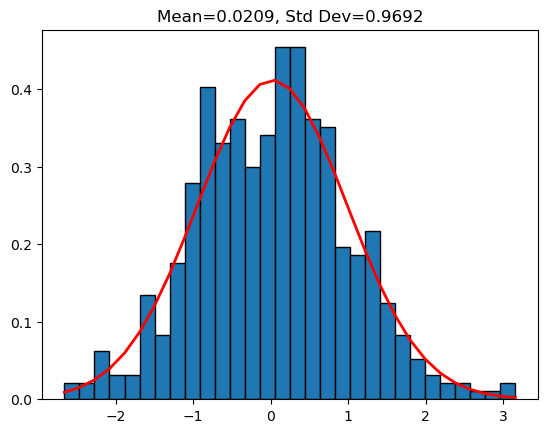

In [17]:
#population in many ways is similar to the training data
#Example of normal distribution
#pmf max probability function, cdf accumulative distribute function, pdf denstity probability distribution: https://www.youtube.com/watch?v=YXLVjCKVP7U
#looks like any x, y plot represents an accumulative distribution so the gradiant of this function or derivate represents de dentisy probability function
rand_data = np.random.normal(loc=0, scale=1, size=500)
h = plt.hist(rand_data, bins=30, histtype='bar', density=1, ec='k') 
print(h[1])

density_data = norm.pdf(h[1], st.mean(rand_data), st.stdev(rand_data))
print(density_data,st.mean(density_data))

plt.plot(h[1], norm.pdf(h[1], st.mean(rand_data), st.stdev(rand_data)), color='r', linewidth=2)
plt.title(r'Mean=%.4f, Std Dev=%.4f' %(st.mean(rand_data), st.stdev(rand_data)))
plt.show()

lineal: [ 0.          4.04040404  8.08080808 12.12121212 16.16161616 20.2020202
 24.24242424 28.28282828 32.32323232 36.36363636]
gamma: [0.         0.01188429 0.04945211 0.06510907 0.05351654 0.03397971
 0.01832468 0.00882907 0.00391719 0.00163183]
normal: [0.00793887 0.01347026 0.02029521 0.02715263 0.03225752 0.03402912
 0.03187653 0.02651503 0.01958456 0.01284506]


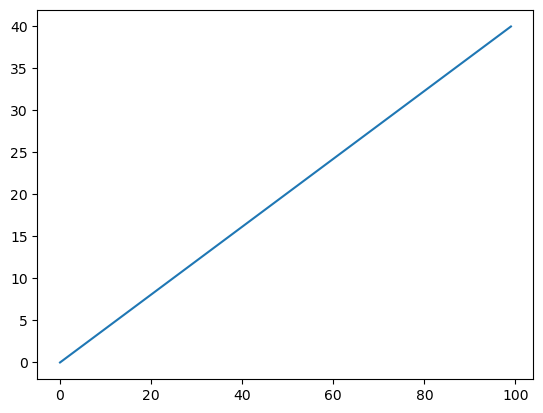

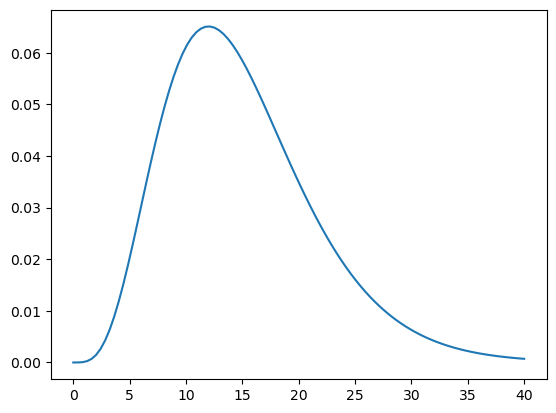

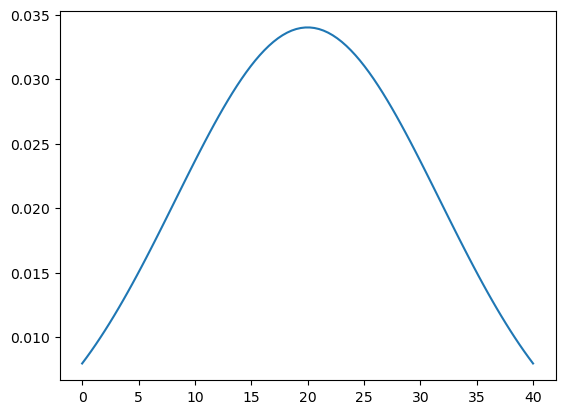

In [18]:
import scipy.stats as stats 
#plotting gamma distribution 
#define x-axis values
x = np.linspace (0, 40, 100) 
#calculate pdf of Gamma distribution for each x-value
y = stats.gamma.pdf(x, a=5, scale=3)
y2 = stats.norm.pdf(x, st.mean(x), st.stdev(x))

print("lineal:",x[::10])
print("gamma:",y[::10])
print("normal:",y2[::10])

plt.plot(x)
plt.show()
#create plot of Gamma distribution
plt.plot(x, y)
plt.show()
#display plot
plt.plot(x, y2)
plt.show()

probability 0.7134952031398099


(array([1.64019904e-02, 6.07638503e-03, 2.48579388e-03, 9.40139992e-04,
        4.01020166e-04, 1.51378473e-04, 5.84267792e-05, 2.39018642e-05,
        1.59345761e-05, 2.65576269e-06]),
 array([2.81118268e-04, 3.76542479e+01, 7.53082146e+01, 1.12962181e+02,
        1.50616148e+02, 1.88270115e+02, 2.25924082e+02, 2.63578048e+02,
        3.01232015e+02, 3.38885982e+02, 3.76539949e+02]),
 <BarContainer object of 10 artists>)

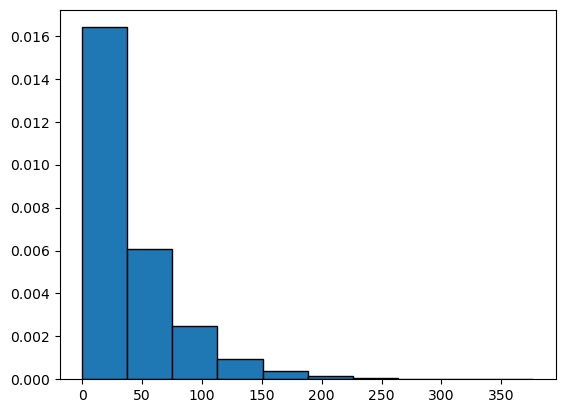

In [ ]:
#exponential function https://www.statology.org/exponential-distribution-python/ , calculate probabilites based on future events when the thinks goes up
from scipy.stats import expon
#calculate probability that x is less than 50 when mean rate is 40
probability = expon.cdf(x=50, scale=40)
print("probability",probability)
#generate exponential distribution with sample size 10000
x = expon.rvs(scale=40, size=10000)

#create plot of exponential distribution
plt.hist(x, density=True, edgecolor='black')

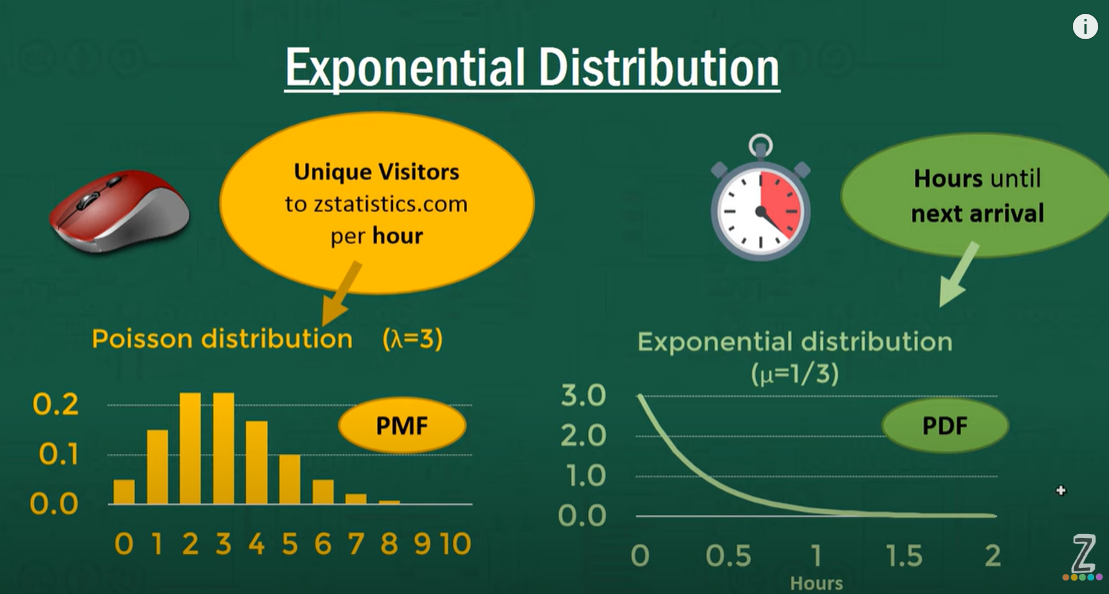

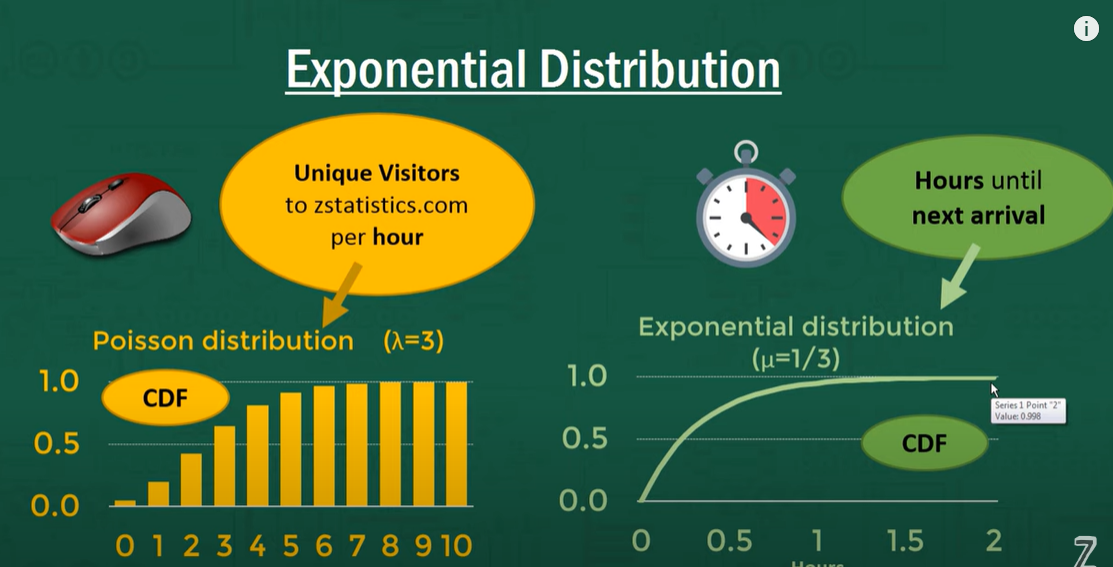

Remember pmf is maximun probability, cdf is accumulative probability, pdf is density probability, 

In [14]:
#if you get 3 visitors each hour what is the probability to get one visitor in the next 10 minutes.
probability = expon.cdf(x=10, scale=20) # we use an accumulative distribution function to calc this
print("probability",probability)
# probability after 30 minutes
probability = expon.cdf(x=30, scale=20) 
print("probability",1 - probability)
# probability between 15 minutes and 45 minutes
probability = expon.cdf(x=15, scale=20) 
probability2 = expon.cdf(x=45, scale=20)
print("probability",probability2 - probability)
#the formula is related to below pic
#thsi values are areas.

probability 0.3934693402873666
probability 0.2231301601484298
probability 0.36696732817915034


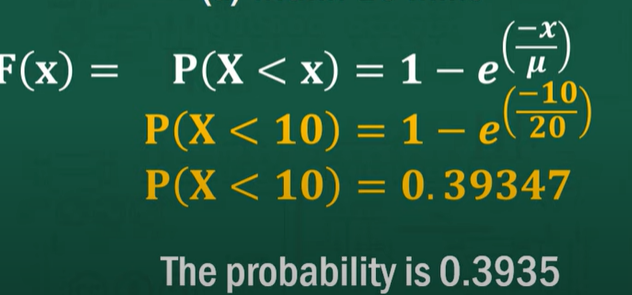

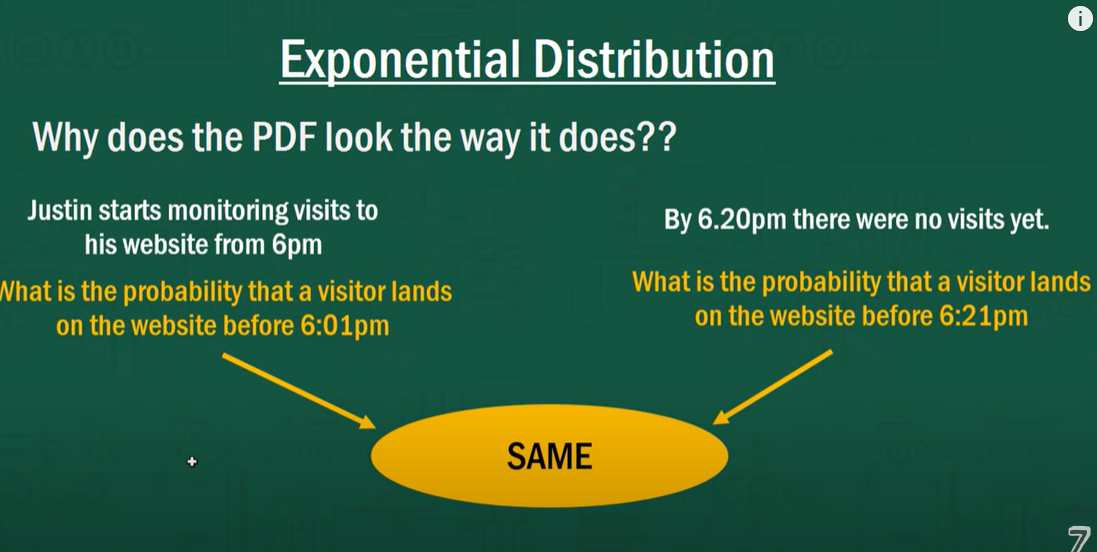

Memorylessness means that all the events are completely independent for that reason the accumulative always will star in one, (if nobody gets at 6:21 it is very probably that someone comes soon)

t test and pvalues: are concepts used on sampling population, represent the similarity between two populations about means and other statistical values.

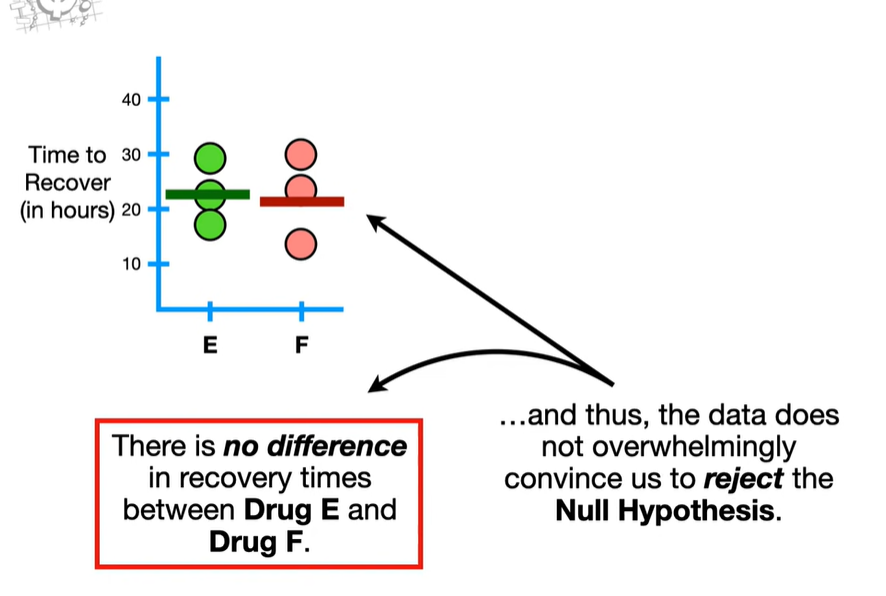

When you create and hypothesis to check if you datasets behaves the same or two are equally good, it is important to check the tiny differences if that subtle differences are not really "overwhelming" we could approve our hypothesis. In the opposite case 

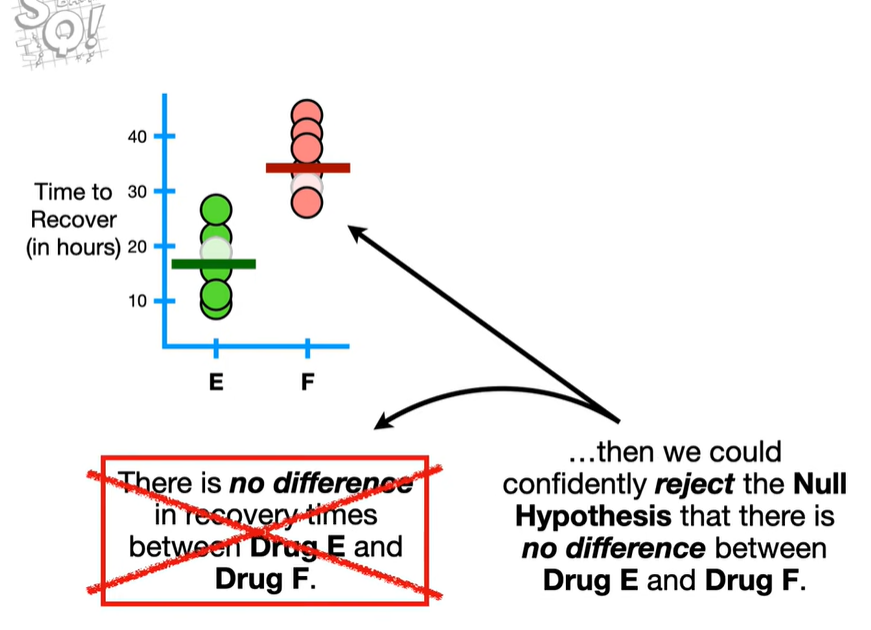

We can confidently reject the hypothesis. (the tiny differences can be attributable to random stuff out of our control, in this we get rid of it)
P values are confidence values, the hypothesis testing tray to prove if two variables a and b are the same or not, and the null hyptohesis is about if a and b are the same.
When we declare a p value we must set a treshold

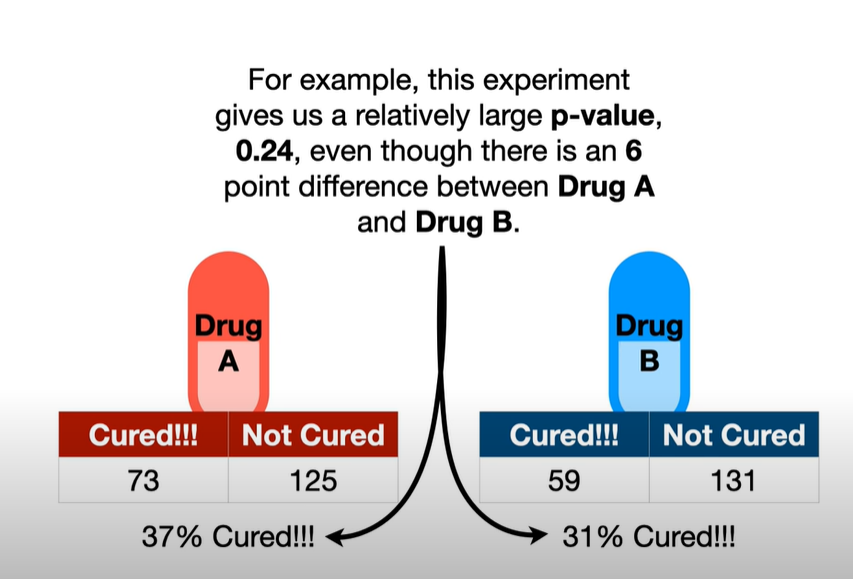

if that p value is bigger than the treshold after a lot of experiment we can determinate that both things are the same.
https://corporatefinanceinstitute.com/resources/data-science/null-hypothesis-2/

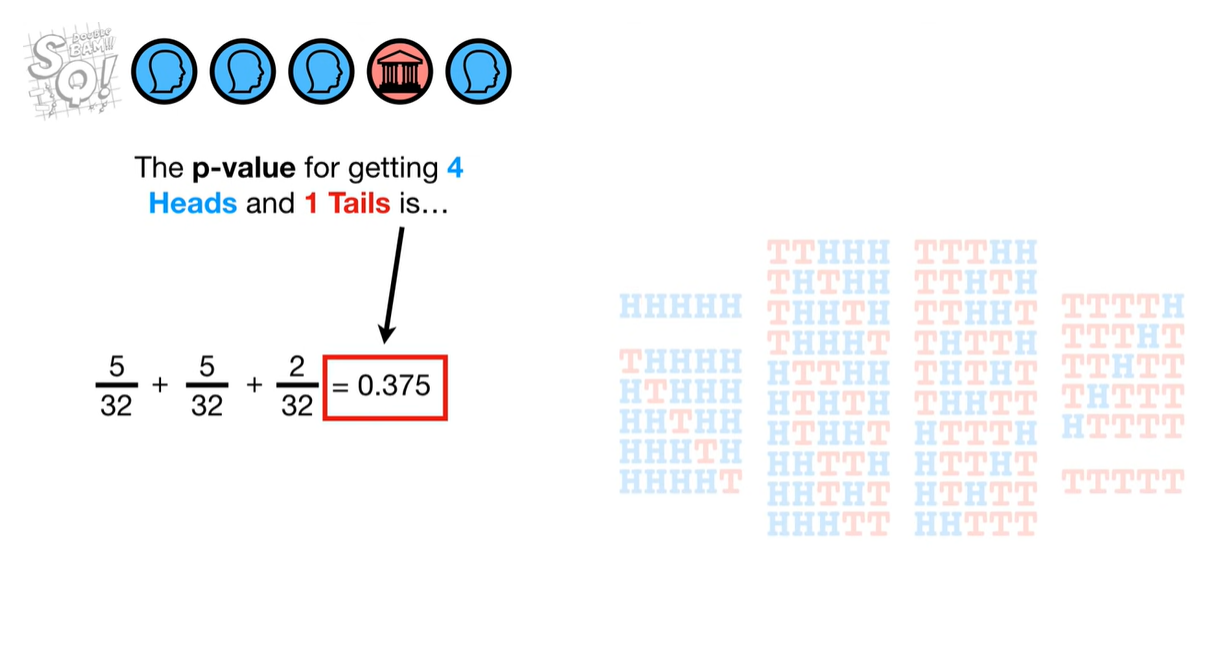

To get the p value it is necessary to :
1. Check the probability of get the observation 4 h and 1 t is equal to 5/32
2. The probability to get something similar, like happend with 4 t and 1 h = 5/32
3. The probability to observe something rarer or more extreme, as only heads and only tails, equal to 2/32 (depending from the experiment this can be 0 )

When using continuos vars, we can have hypothesis to check if some value fits into a distribution 

simple p values exercises: https://www.dummies.com/article/academics-the-arts/math/statistics/practice-calculating-p-values-147275/

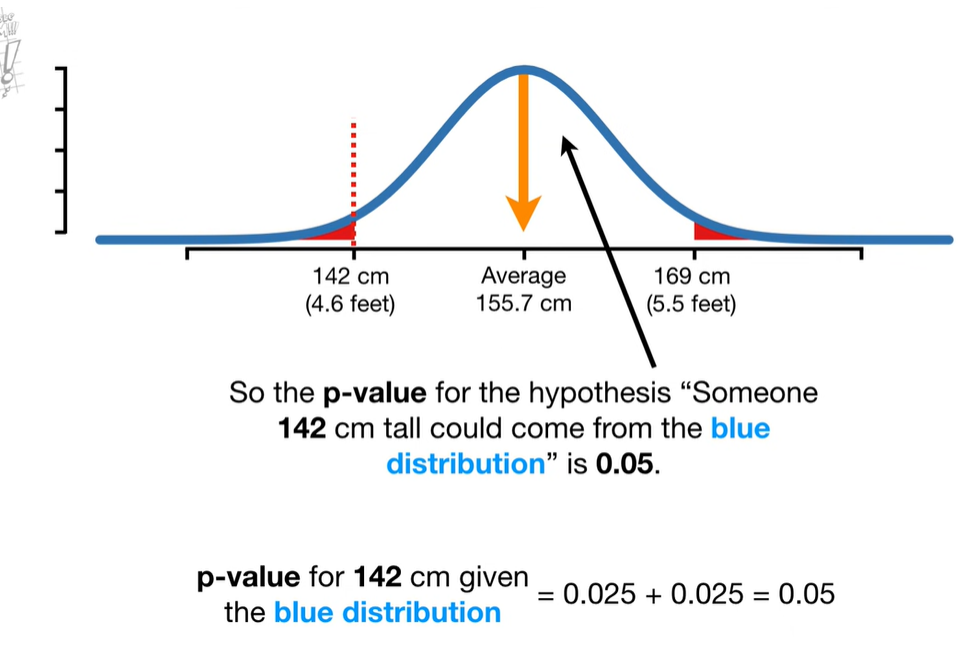

cause the value is 0.05 is the limit we could reject the null hypothesis and determinate that this height does not fit well with the distribution that we propossed.
It is important to recall that when we get the p-value we are trying to confirm that our observations it is something usual on the sample and not an outlier https://www.youtube.com/watch?v=2ARvj-8tJBs

Multiple testing problem: The problem that happen with the fake possitives that could lead to bad assumptions about the outcome, a technique that can help with this is Fake discovery rates and power analysis a technique that helps to determinate the size of the sample prior to start an experiment.
https://www.statisticshowto.com/t-statistic/

In [14]:
from scipy import stats
rvs1 = stats.norm.rvs(loc = 5,scale = 10,size = 500)
rvs2 = stats.norm.rvs(loc = 5,scale = 10,size = 500)
print(stats.ttest_ind(rvs1,rvs2))
#Tht t statistics as bigger it is identify that an event is really extraordinary  in a random sample

Ttest_indResult(statistic=1.5054101576488113, pvalue=0.1325350746235223)


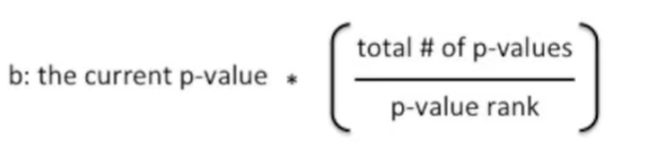

<b>How to estimate the properly sample size for a population:</b> Power Analysis. When we are comparing two distribution and we pass the null hypothesis, we can identify that for more overlap and a fixed power value more samples are required.

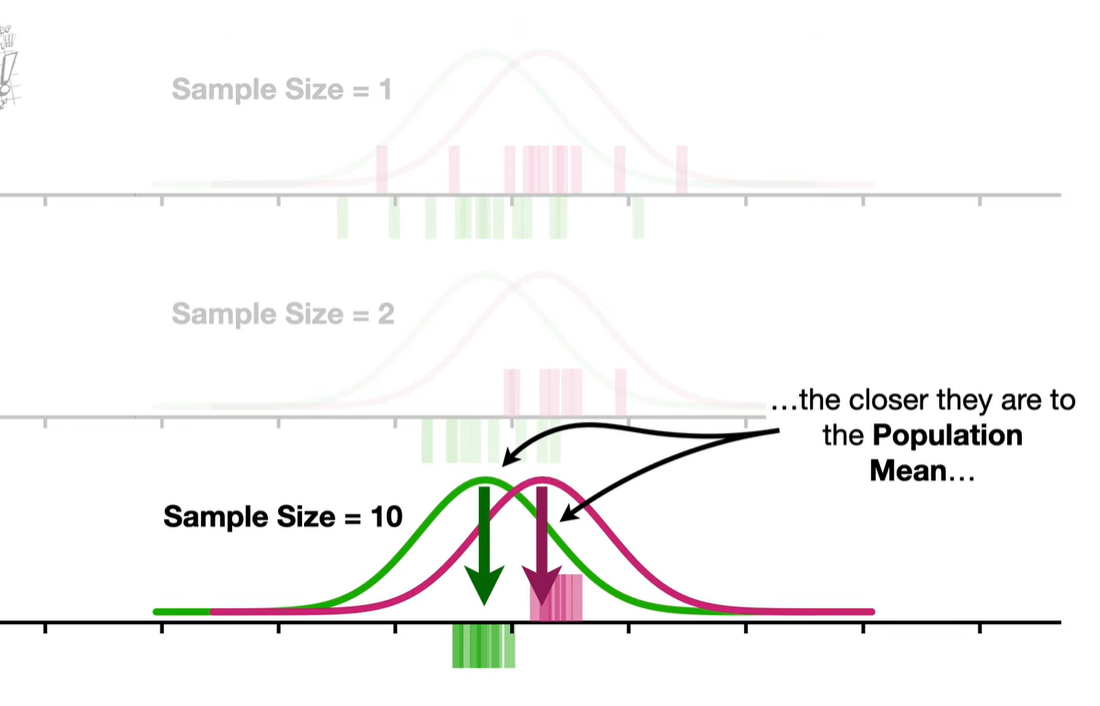

As we see on the samples above when we have 10 the averages of the population get really close the population mean https://www.youtube.com/watch?v=VX_M3tIyiYk&list=PLblh5JKOoLUJUNlfvCNhJMNjNNpt5ljcR&index=16

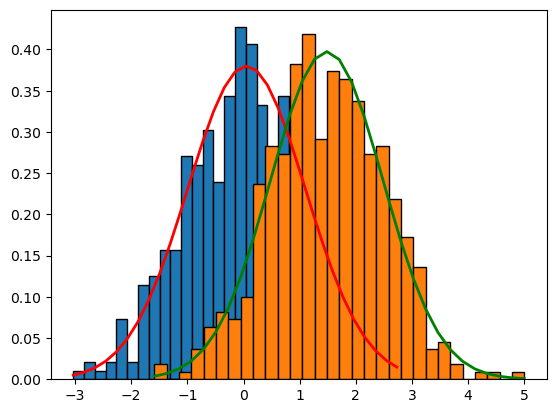

Effect size: -1.3906054009723394
Sample size/Number needed in each group: 9.185
Power: 1.000


In [31]:
from statsmodels.stats.power import TTestIndPower, TTestPower

dist1 = np.random.normal(loc=0, scale=1, size=500)
dist2 = np.random.normal(loc=0, scale=1, size=500) + 1.5
#################### dist 1
h = plt.hist(dist1, bins=30, histtype='bar', density=1, ec='k') 
density_data = norm.pdf(h[1], st.mean(dist1), st.stdev(dist1))
plt.plot(h[1], density_data, color='r', linewidth=2)
#################### dist 2
h = plt.hist(dist2, bins=30, histtype='bar', density=1, ec='k') 
density_data = norm.pdf(h[1], st.mean(dist2), st.stdev(dist2))
plt.plot(h[1], density_data, color='g', linewidth=2)
plt.show()
#################### power analysis
#size
n1, n2 = len(dist1), len(dist2)
#varianze
s1, s2 = st.variance(dist1), st.variance(dist2)
# calculate the pooled standard deviation 
# (Cohen's d)
s = math.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
# means of the samples
u1, u2 = st.mean(dist1),st.mean(dist2)
# calculate the effect size
d = (u1 - u2) / s
print(f'Effect size: {d}')
# factors for power analysis
alpha = 0.05
power = 0.8
  
# perform power analysis to find sample size 
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=d, alpha=alpha, power=power, 
                    ratio=1, alternative='two-sided')
  
print('Sample size/Number needed in each group: {:.3f}'.format(n))

#### i still dont get this function
power = TTestPower()
n_test = power.solve_power(nobs=500, effect_size = 0.5,
                           power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

#details from the exercise https://www.geeksforgeeks.org/introduction-to-power-analysis-in-python/#:~:text=Power%20analysis%20using%20Python%20The%20stats.power%20module%20of,test%2C%20F-tests%2C%20and%20Chi-square%20goodness%20of%20fit%20test.


About the logs: The logs of multipled numbers are the sume of its exponents
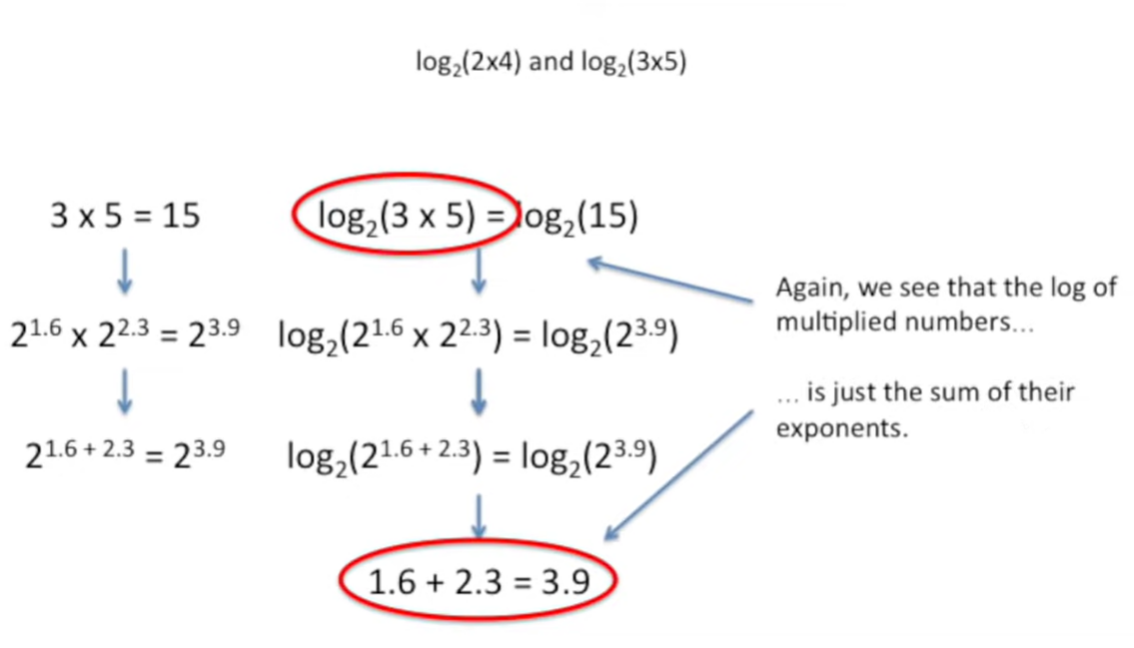

Just remember, p value is the provability of that an event happens in accordance to the null hypothesis, and the null hypothesis could be describe as the possibility when we get a sample from the population than this sample looks different just by random things and not for nothing release special. so a bigger p value means than that i right a lower value reject the null hypothesis.

In [20]:
import numpy as np

numeros = [1000000, 5000000, 2000000, 3000000, 1500000]

# Calcular la media geométrica utilizando logaritmos
log_numeros = np.log(numeros)
media_aritmetica_logaritmos = np.mean(log_numeros)
media_geometrica = np.exp(media_aritmetica_logaritmos)

print("Media geométrica:", media_geometrica)

# Utilizar logaritmos previene problemas de overflow

Media geométrica: 2141127.3683383213


# Mega Million


In [6]:
import pandas as pd
import numpy as np

# Load the data from a CSV file with a semicolon separator and no header row into a pandas DataFrame
df = pd.read_csv('./datasets/mega_millions_historic.csv', sep=',')

# Display the first 5 rows of the DataFrame
print(df.head())

        date  ball_1  ball_2  ball_3  ball_4  ball_5  mega_ball mega_plier
0  7/26/2022       7      29      60      63      66         15         3X
1  7/22/2022      14      40      60      64      66         16         3X
2  7/19/2022       2      31      32      37      70         25         3X
3  7/15/2022       8      20      26      53      64         15         5X
4  7/12/2022       4       7      10      45      64         12         2X


In [12]:
# Extract the columns 'a', 'b', and 'c' as a numpy array
cols = df[['ball_1', 'ball_2', 'ball_3', 'ball_4', 'ball_5']].values

# Join the columns into a single array
arr = np.hstack(cols)

arr.size

6515

In [20]:
# Find the unique values in the array
unique_values, counts = np.unique(arr, return_counts=True)

# Create a frequency table
freq_table = np.asarray((unique_values, counts)).T

print(freq_table)

[[  1  90]
 [  2 111]
 [  3 112]
 [  4 113]
 [  5  84]
 [  6 100]
 [  7  98]
 [  8  99]
 [  9  95]
 [ 10 118]
 [ 11 120]
 [ 12  97]
 [ 13  90]
 [ 14 110]
 [ 15  99]
 [ 16  96]
 [ 17 119]
 [ 18  98]
 [ 19  95]
 [ 20 127]
 [ 21  91]
 [ 22  94]
 [ 23  89]
 [ 24 106]
 [ 25 102]
 [ 26  95]
 [ 27  96]
 [ 28 104]
 [ 29 105]
 [ 30  95]
 [ 31 123]
 [ 32  93]
 [ 33  98]
 [ 34  99]
 [ 35  95]
 [ 36  91]
 [ 37  91]
 [ 38 106]
 [ 39  99]
 [ 40  90]
 [ 41 101]
 [ 42  97]
 [ 43  91]
 [ 44 100]
 [ 45  96]
 [ 46 105]
 [ 47  90]
 [ 48 113]
 [ 49  91]
 [ 50  91]
 [ 51  93]
 [ 52  85]
 [ 53 108]
 [ 54  87]
 [ 55  71]
 [ 56 102]
 [ 57  62]
 [ 58  74]
 [ 59  60]
 [ 60  56]
 [ 61  54]
 [ 62  69]
 [ 63  57]
 [ 64  63]
 [ 65  50]
 [ 66  64]
 [ 67  44]
 [ 68  65]
 [ 69  55]
 [ 70  60]
 [ 71  22]
 [ 72  20]
 [ 73  31]
 [ 74  30]
 [ 75  25]]


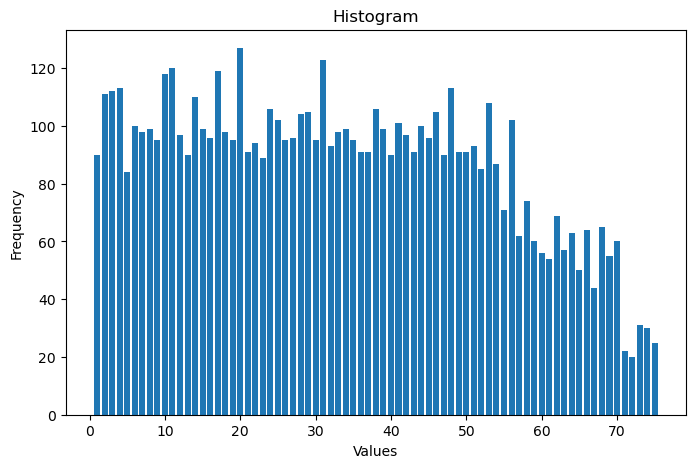

In [21]:
# Extract the unique values and their counts from the frequency table
values, counts = freq_table[:, 0], freq_table[:, 1]

# Set the figure size and title
plt.figure(figsize=(8, 5))
plt.title('Histogram')

# Plot the histogram using a bar plot
plt.bar(values, counts)

# Add a label to the x-axis
plt.xlabel('Values')

# Add a label to the y-axis
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [23]:
# Sort the frequency table by the counts in descending order
sorted_table = freq_table[freq_table[:, 1].argsort()[::-1]]

# Get the first five rows of the sorted table
most_common = sorted_table[:]

print(most_common)

[[ 20 127]
 [ 31 123]
 [ 11 120]
 [ 17 119]
 [ 10 118]
 [  4 113]
 [ 48 113]
 [  3 112]
 [  2 111]
 [ 14 110]
 [ 53 108]
 [ 38 106]
 [ 24 106]
 [ 29 105]
 [ 46 105]
 [ 28 104]
 [ 56 102]
 [ 25 102]
 [ 41 101]
 [ 44 100]
 [  6 100]
 [ 34  99]
 [ 15  99]
 [ 39  99]
 [  8  99]
 [ 33  98]
 [  7  98]
 [ 18  98]
 [ 42  97]
 [ 12  97]
 [ 16  96]
 [ 45  96]
 [ 27  96]
 [ 35  95]
 [ 30  95]
 [ 26  95]
 [ 19  95]
 [  9  95]
 [ 22  94]
 [ 32  93]
 [ 51  93]
 [ 36  91]
 [ 37  91]
 [ 49  91]
 [ 50  91]
 [ 21  91]
 [ 43  91]
 [ 13  90]
 [  1  90]
 [ 47  90]
 [ 40  90]
 [ 23  89]
 [ 54  87]
 [ 52  85]
 [  5  84]
 [ 58  74]
 [ 55  71]
 [ 62  69]
 [ 68  65]
 [ 66  64]
 [ 64  63]
 [ 57  62]
 [ 59  60]
 [ 70  60]
 [ 63  57]
 [ 60  56]
 [ 69  55]
 [ 61  54]
 [ 65  50]
 [ 67  44]
 [ 73  31]
 [ 74  30]
 [ 75  25]
 [ 71  22]
 [ 72  20]]


In [19]:
#Null hypothesis example
import numpy as np
import scipy.stats as stats

# Example data
inversion_publicidad = [1000, 2000, 3000, 4000, 5000]
ventas_generadas = [50, 60, 85, 110, 130]

# Calculate the Pearson correlation coefficient and p-value
corr_coeff, p_value = stats.pearsonr(inversion_publicidad, ventas_generadas)

# Set a significance level (usually 0.05)
significance_level = 0.05

# Print the results
print(f"Pearson correlation coefficient: {corr_coeff:.2f}")
print(f"p-value: {p_value:.4f}")

# Evaluate the null hypothesis
if p_value < significance_level:
    print("We reject the null hypothesis. There is a significant relationship between advertising investment and generated sales.")
else:
    print("We cannot reject the null hypothesis. There is not enough evidence to claim that there is a significant relationship between advertising investment and generated sales.")


Pearson correlation coefficient: 0.99
p-value: 0.0008
We reject the null hypothesis. There is a significant relationship between advertising investment and generated sales.
